In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file into a dictionary of DataFrames
xlsx_file = pd.read_excel('HEAT_Tables_0422_am_1327.xlsx', sheet_name=['RP1', 'Abj_outputs', 'Jhb_outputs'])

# Extract each DataFrame from the dictionary
df_rp1 = xlsx_file['RP1']
df_abj = xlsx_file['Abj_outputs']
df_jhb = xlsx_file['Jhb_outputs']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract each DataFrame from the dictionary
df_rp1 = xlsx_file['RP1']
df_abj = xlsx_file['Abj_outputs']
df_jhb = xlsx_file['Jhb_outputs']

# Print the data types of each DataFrame
print("Data types in df_rp1:")
print(df_rp1.dtypes)
print("\nData types in df_abj:")
print(df_abj.dtypes)
print("\nData types in df_jhb:")
print(df_jhb.dtypes)


Data types in df_rp1:
Stage    object
Jan       int64
Feb       int64
Mar       int64
Apr       int64
May       int64
Jun       int64
Jul       int64
Aug       int64
Sep       int64
Oct       int64
Nov       int64
Dec       int64
Jan.1     int64
Feb.1     int64
Mar.1     int64
Apr.1     int64
dtype: object

Data types in df_abj:
Stage     object
Apr      float64
May      float64
Jun      float64
Jul      float64
Aug        int64
Sep        int64
Oct        int64
Nov        int64
Dec        int64
Jan        int64
Feb        int64
Mar        int64
Apr.1      int64
dtype: object

Data types in df_jhb:
Stage     object
Apr      float64
May      float64
Jun      float64
Jul      float64
Aug      float64
Sep      float64
Oct      float64
Nov      float64
Dec        int64
Jan        int64
Feb        int64
Mar        int64
Apr.1      int64
dtype: object


In [3]:
def map_month_year(df, start_year=2023):
    month_map = {}
    encountered_dec = False  # Flag to indicate if we've encountered 'Dec'

    # A list to ensure the months are in the correct order
    months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Iterate over the columns in the dataframe
    for column in df.columns:
        # Check if the column name contains a month abbreviation
        if any(month in column for month in months_in_order):
            # Strip away any additional characters (like ".1") to find the base month name
            base_month_name = ''.join(filter(str.isalpha, column))
            # If we've already encountered December, and we see January again, increment the year
            if base_month_name == 'Jan' and encountered_dec:
                start_year += 1
            # Once we encounter December, set the flag
            if base_month_name == 'Dec':
                encountered_dec = True
            # Map the original column name to the new format "Month Year"
            month_map[column] = f'{base_month_name} {start_year}'
    
    # Rename the columns in the dataframe
    df = df.rename(columns=month_map)

    return df


def map_month_year(df):
    # Initial start year for the data
    year = 2023
    month_map = {}
    previous_month = 'Dec'  # Starting assumption for a year change

    # A list to ensure the months are in the correct order
    months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Iterate over the columns in the dataframe
    for column in df.columns:
        # Check if the column name contains a month abbreviation
        if any(month in column for month in months_in_order):
            # Strip away any additional characters (like ".1") to find the base month name
            base_month_name = ''.join(filter(str.isalpha, column))
            # If we find January and the previous month was December, increment the year
            if base_month_name == 'Jan' and previous_month == 'Dec':
                year += 1
            # Map the original column name to the new format "Month Year"
            month_map[column] = f'{base_month_name} {year}'
            previous_month = base_month_name
    
    # Rename the columns in the dataframe
    df = df.rename(columns=month_map)

    return df

In [4]:
# Convert the month columns in each DataFrame to a datetime format
df_rp1 = map_month_year(df_rp1)
df_abj = map_month_year(df_abj)
df_jhb = map_month_year(df_jhb)

# Optionally, print the new column names to verify the changes
print(df_rp1.columns)
print(df_abj.columns)
print(df_jhb.columns)


Index(['Stage', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023',
       'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023',
       'Dec 2023', 'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024'],
      dtype='object')
Index(['Stage', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023',
       'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024', 'Feb 2024',
       'Mar 2024', 'Apr 2024'],
      dtype='object')
Index(['Stage', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023',
       'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024', 'Feb 2024',
       'Mar 2024', 'Apr 2024'],
      dtype='object')


In [5]:
import pandas as pd

# Assuming your dataframes are named df_rp1, df_abj, and df_jhb

# Define a list of your dataframes
dfs = [df_rp1, df_abj, df_jhb]

# Define the conversion function
def convert_column_to_datetime(df):
    new_columns = []
    for col in df.columns:
        if col == 'Stage':  # Skip the 'Stage' column
            new_columns.append(col)
        else:
            # Remove any trailing whitespaces and append ' 1' to indicate the first of the month
            date_str = col.strip() + ' 1'
            # Convert the string to a datetime object with the format "Month Year Day"
            new_columns.append(pd.to_datetime(date_str, format='%b %Y %d', errors='coerce'))
    df.columns = new_columns

# Apply the conversion to each dataframe
for dataframe in dfs:
    convert_column_to_datetime(dataframe)

# Now df_rp1, df_abj, and df_jhb should have datetime objects as their column headers, except for 'Stage'.


In [6]:
# Print the index of each dataframe
print("Stages in df_rp1:", df_rp1.index.tolist())
print("Stages in df_abj:", df_abj.index.tolist())
print("Stages in df_jhb:", df_jhb.index.tolist())

# Use set operations to find differences
stages_rp1 = set(df_rp1.index.tolist())
stages_abj = set(df_abj.index.tolist())
stages_jhb = set(df_jhb.index.tolist())

# Find stages that are not common to all dataframes
unique_to_rp1 = stages_rp1.difference(stages_abj).difference(stages_jhb)
unique_to_abj = stages_abj.difference(stages_rp1).difference(stages_jhb)
unique_to_jhb = stages_jhb.difference(stages_rp1).difference(stages_abj)

print("Stages unique to df_rp1:", unique_to_rp1)
print("Stages unique to df_abj:", unique_to_abj)
print("Stages unique to df_jhb:", unique_to_jhb)

# Find stages that are common to all dataframes
common_stages = stages_rp1.intersection(stages_abj).intersection(stages_jhb)
print("Common stages:", common_stages)

# Check if there are any differences
if unique_to_rp1 or unique_to_abj or unique_to_jhb:
    print("There are differences in the stage names across the dataframes.")
else:
    print("All stage names are consistent across the dataframes.")




Stages in df_rp1: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Stages in df_abj: [0, 1, 2, 3, 4, 5, 6, 7]
Stages in df_jhb: [0, 1, 2, 3, 4, 5, 6, 7]
Stages unique to df_rp1: {8}
Stages unique to df_abj: set()
Stages unique to df_jhb: set()
Common stages: {0, 1, 2, 3, 4, 5, 6, 7}
There are differences in the stage names across the dataframes.


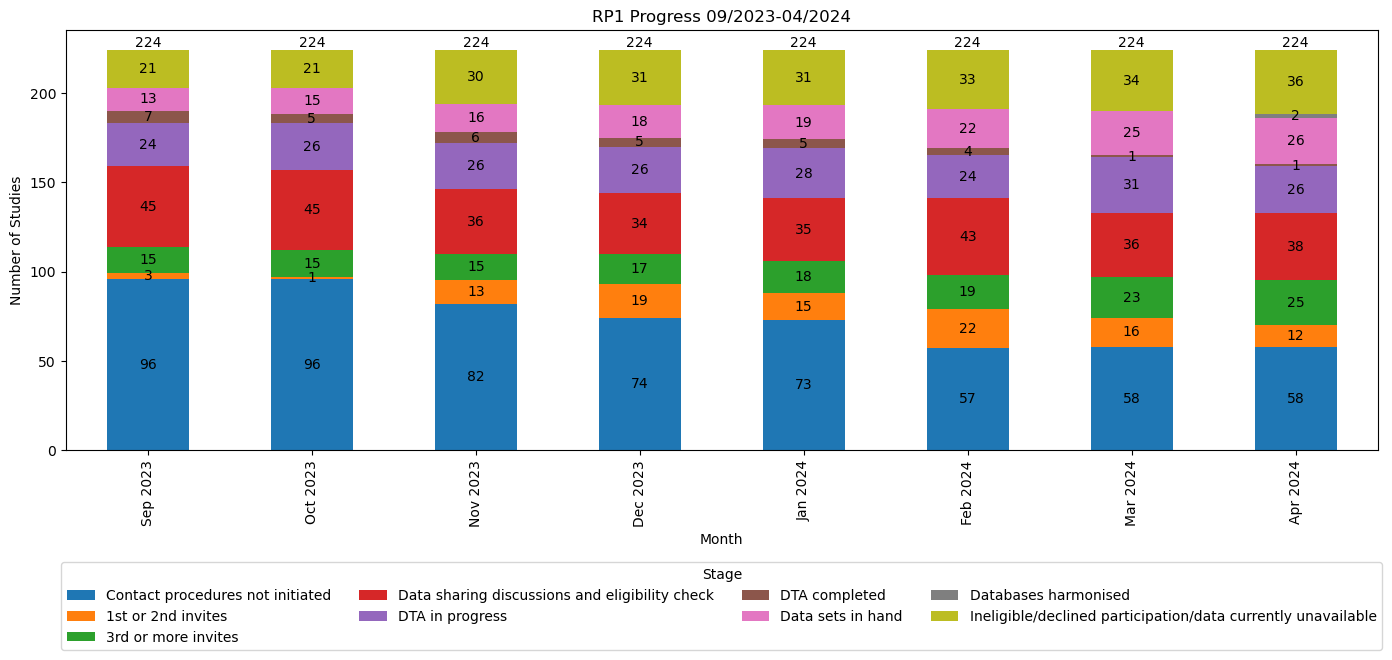

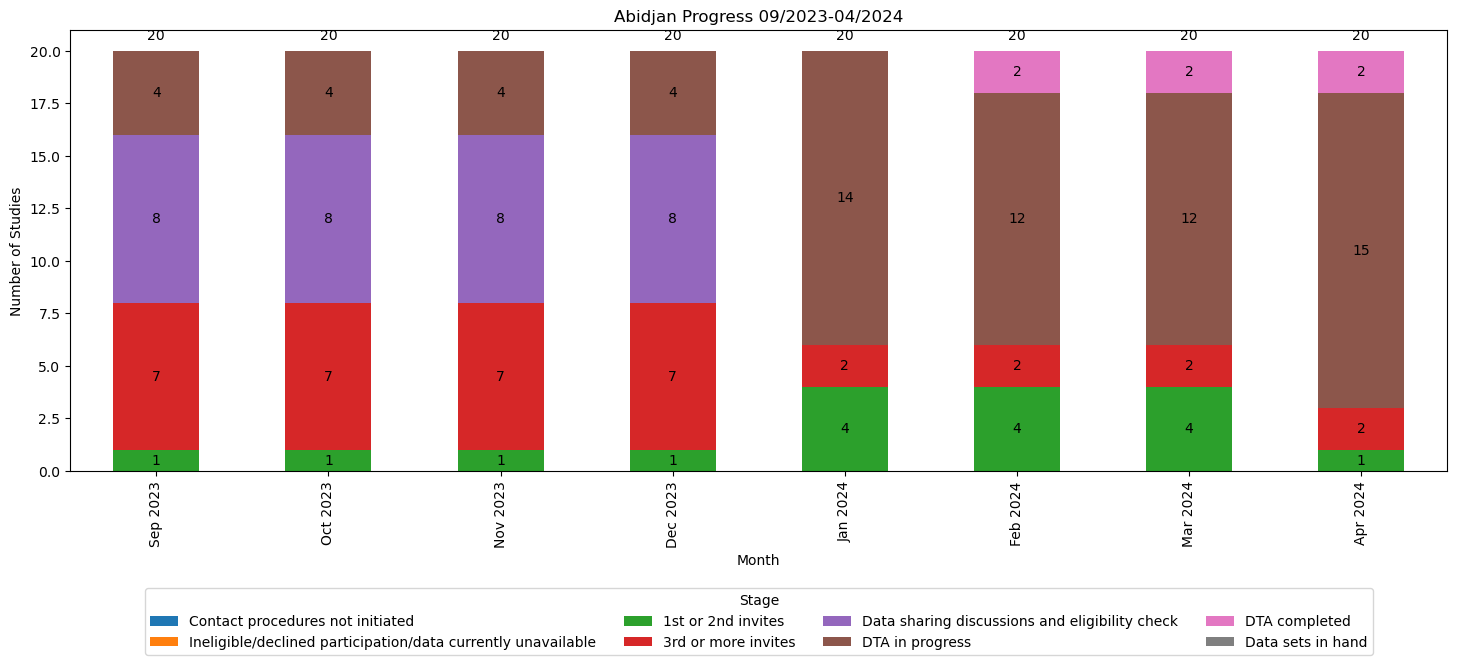

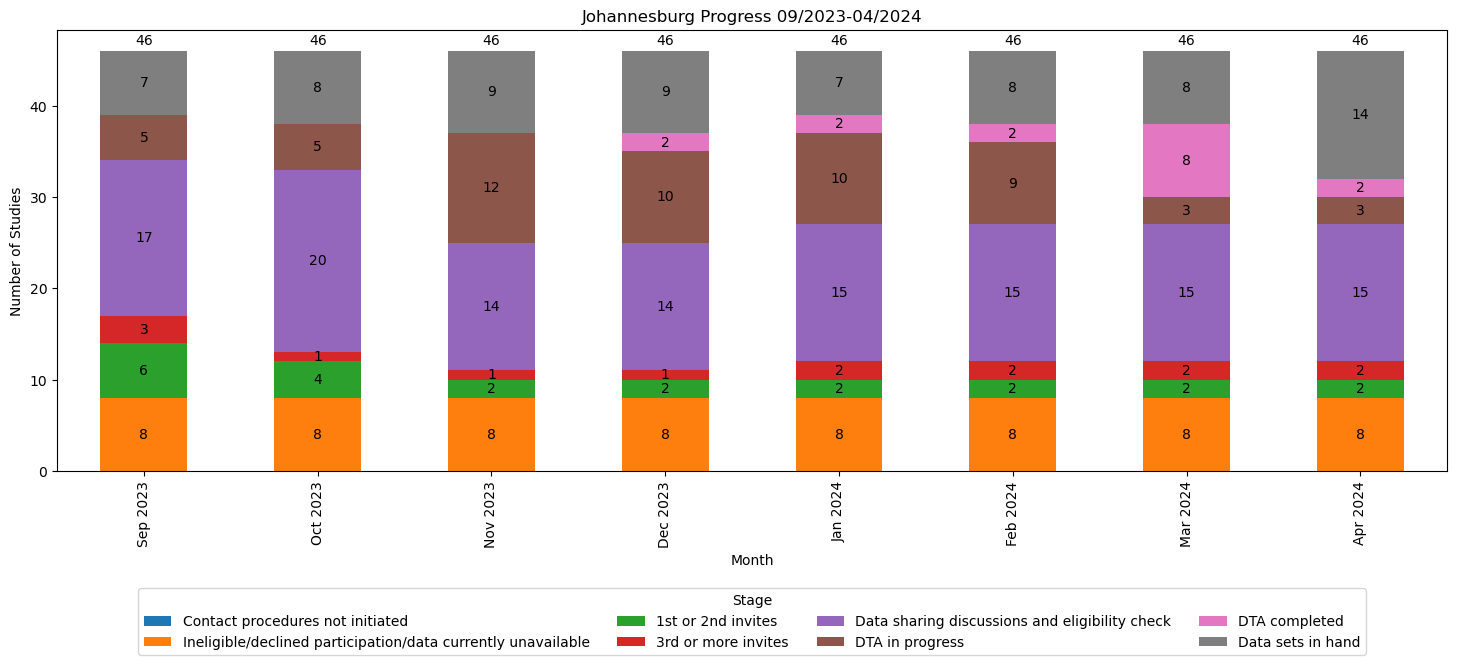

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title, last_n_months=8):
    # Drop the rows for totals as they are not stages
    stages_df = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', labels=[int(val.get_height()) if val.get_height() > 0 else '' for val in container])
    
    # Calculate and label the total number of studies for each month
    totals = transposed_df.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + 0.4, str(int(total)), ha='center', va='bottom')

    # Set legend below the chart with the same order as the bars
    handles, labels = ax.get_legend_handles_labels()
    ordered_labels = transposed_df.columns.tolist()
    ordered_handles = [handles[labels.index(lab)] for lab in ordered_labels if lab in labels]
    
    ax.legend(ordered_handles, ordered_labels, title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([x.strftime('%b %Y') for x in transposed_df.index])

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Assuming you have already read the data into df_rp1, df_abj, df_jhb
# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress 09/2023-04/2024', last_n_months=8)
plot_stacked_bar_chart(df_abj, 'Abidjan Progress 09/2023-04/2024', last_n_months=8)
plot_stacked_bar_chart(df_jhb, 'Johannesburg Progress 09/2023-04/2024', last_n_months=8)

# Show plots
plt.show()


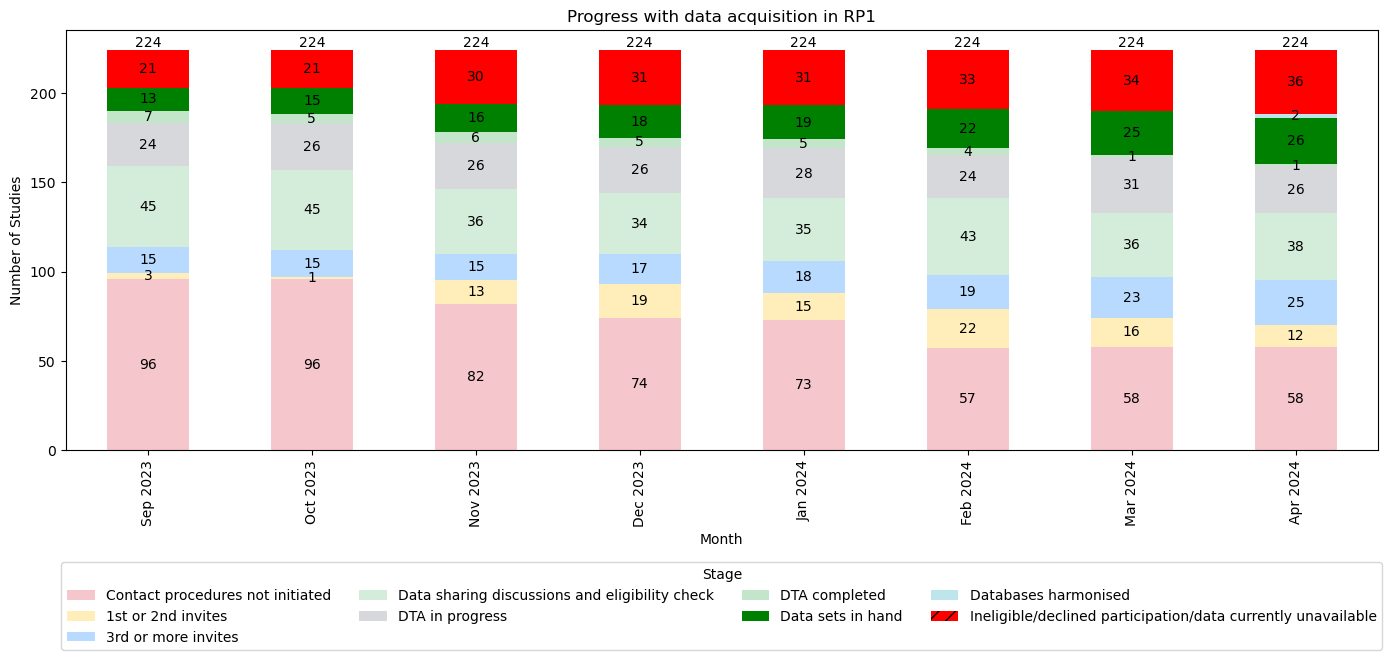

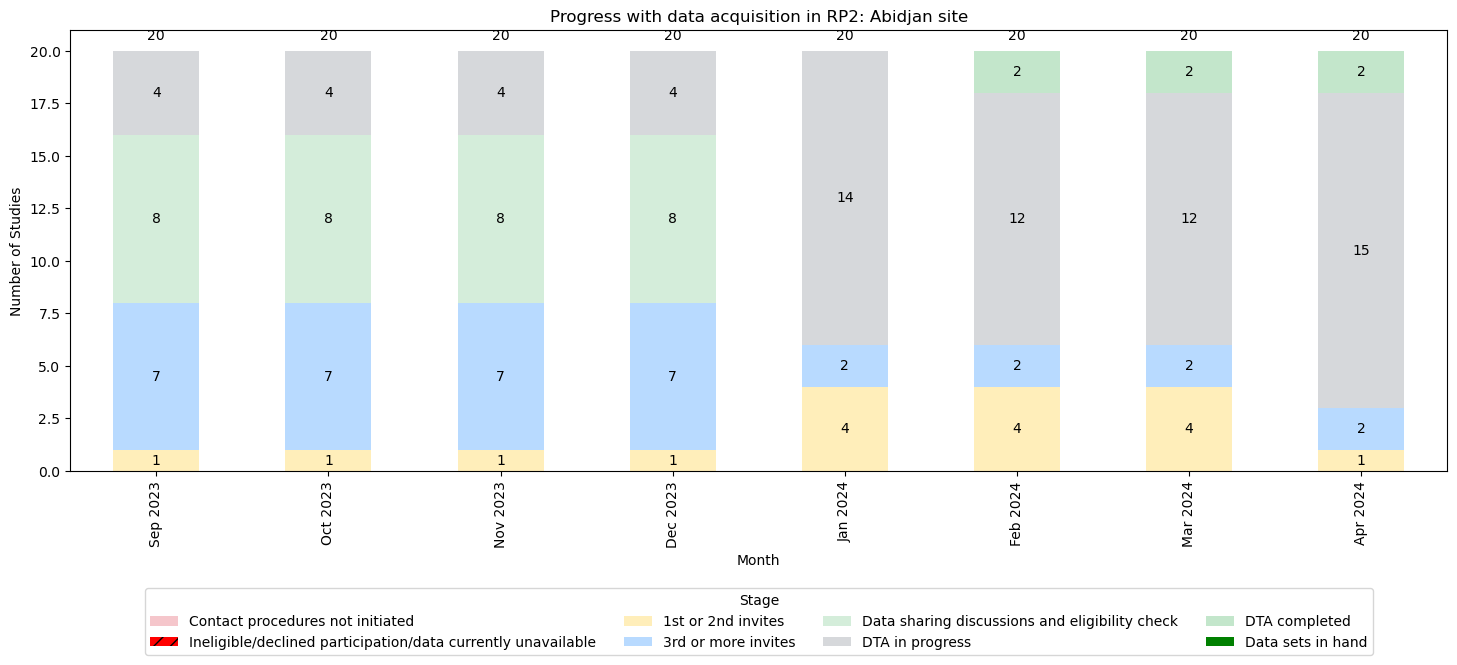

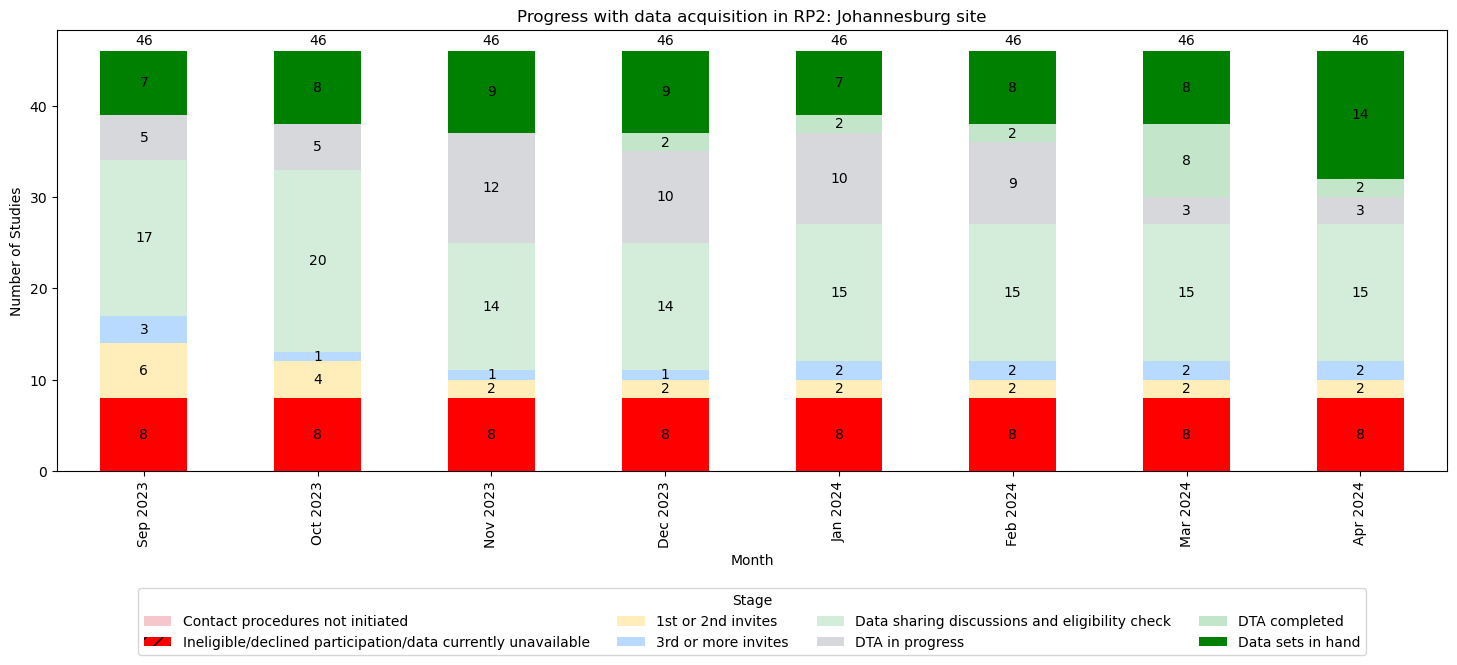

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title, last_n_months=8, color_map=None):
    # Drop the rows for totals as they are not stages
    stages_df = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7), color=[color_map.get(x, '#333333') for x in transposed_df.columns])
    
    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', labels=[int(val.get_height()) if val.get_height() > 0 else '' for val in container])
    
    # Calculate and label the total number of studies for each month
    totals = transposed_df.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + 0.4, str(int(total)), ha='center', va='bottom')

    # Add a custom legend to reflect hatching
    handles, labels = ax.get_legend_handles_labels()
    custom_handles = [Patch(facecolor=color_map[label], hatch='//') if label == 'Ineligible/declined participation/data currently unavailable' else Patch(facecolor=color_map[label]) for label in labels]
    
    ax.legend(custom_handles, labels, title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([x.strftime('%b %Y') for x in transposed_df.index])

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Define your color map here
color_map = {
    'Contact procedures not initiated': '#f5c6cb',
    '1st or 2nd invites': '#ffeeba',
    '3rd or more invites': '#b8daff',
    'Data sharing discussions and eligibility check': '#d4edda',
    'DTA in progress': '#d6d8db',
    'DTA completed': '#c3e6cb',
    'Data sets in hand': 'green',  # Green color for "Data sets in hand"
    'Databases harmonised': '#bee5eb',
    'Ineligible/declined participation/data currently unavailable': 'red'  # Red color for "Ineligible/declined participation/data currently unavailable"
}

# Assuming you have already read the data into df_rp1, df_abj, df_jhb
# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'Progress with data acquisition in RP1', last_n_months=8, color_map=color_map)
plot_stacked_bar_chart(df_abj, 'Progress with data acquisition in RP2: Abidjan site', last_n_months=8, color_map=color_map)
plot_stacked_bar_chart(df_jhb, 'Progress with data acquisition in RP2: Johannesburg site', last_n_months=8, color_map=color_map)

# Show plots
plt.show()


In [9]:
stage_order = [
    'Contact procedures not initiated',
    '1st or 2nd invites',
    '3rd or more invites',
    'Data sharing discussions and eligibility check',
    'DTA in progress',
    'DTA completed',
    'Data sets in hand',
    'Databases harmonised',
    'Ineligible/declined participation/data currently unavailable'
]


# Define your color map here
color_map = {
    'Contact procedures not initiated': '#f5c6cb',
    '1st or 2nd invites': '#ffeeba',
    '3rd or more invites': '#b8daff',
    'Data sharing discussions and eligibility check': '#d4edda',
    'DTA in progress': '#d6d8db',
    'DTA completed': '#c3e6cb',
    'Data sets in hand': 'green',  # Green color for "Data sets in hand"
    'Databases harmonised': '#bee5eb',
    'Ineligible/declined participation/data currently unavailable': 'red'  # Red color for "Ineligible/declined participation/data currently unavailable"
}


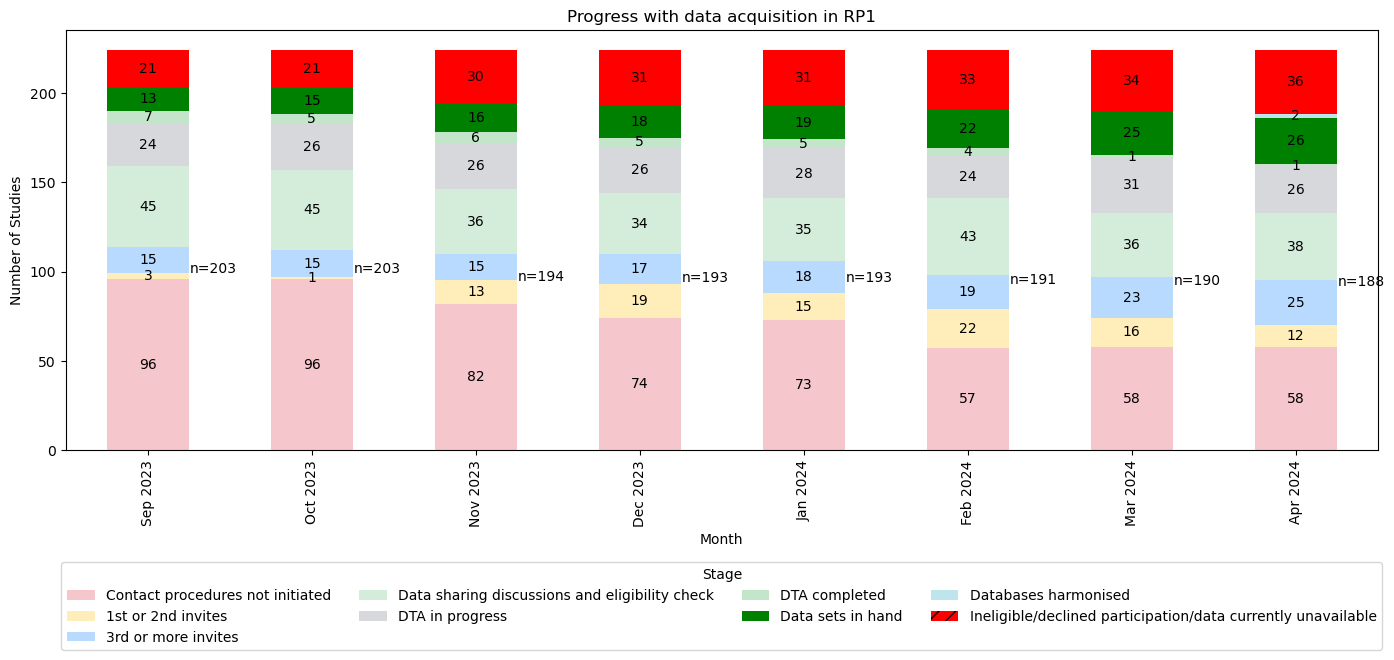

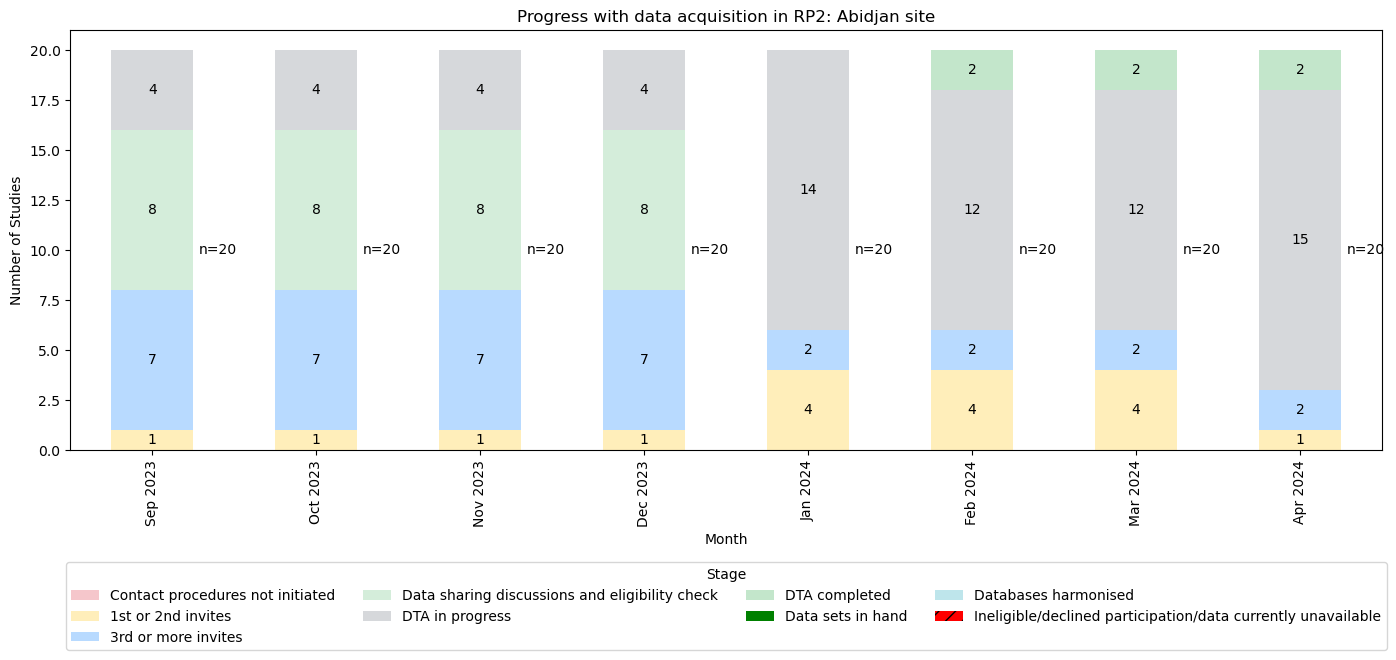

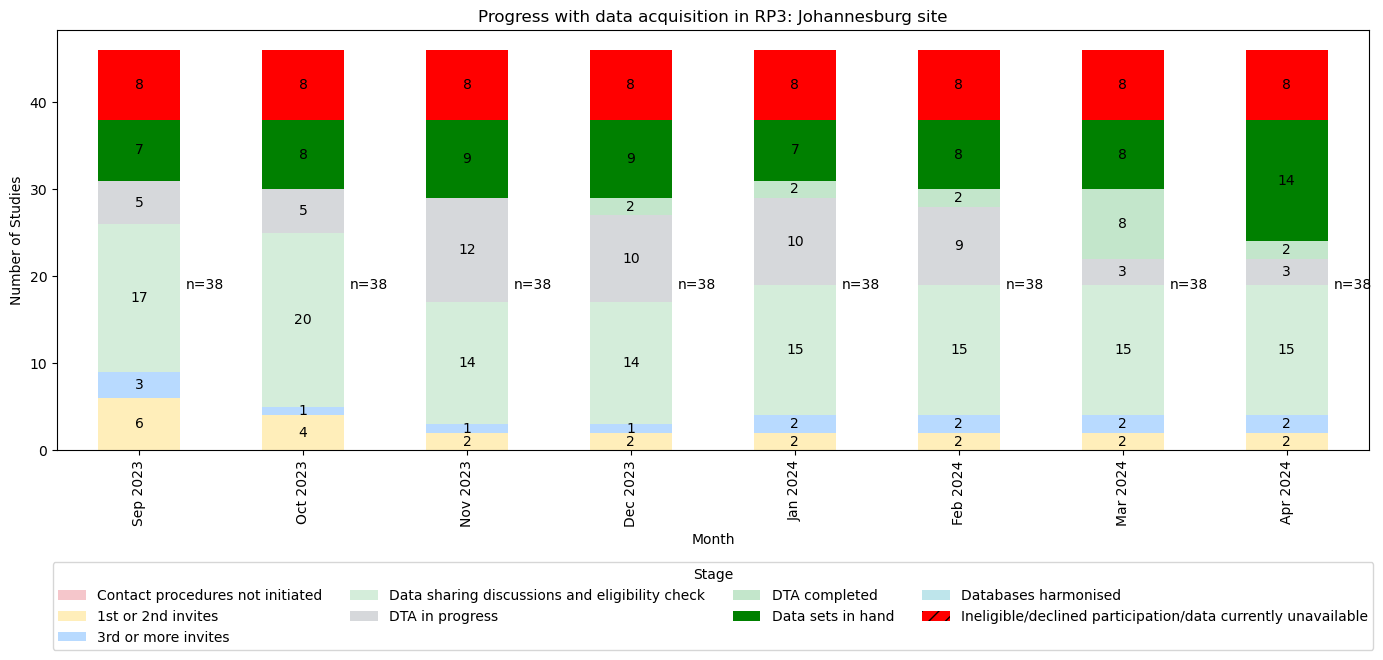

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_stacked_bar_chart(df, title, last_n_months=8, color_map=None, stage_order=None, label_shift=0.0):
    # Drop the rows for totals as they are not stages
    df = df.set_index('Stage').reindex(stage_order).reset_index()
    stages_df = df[~df['Stage'].str.contains("Total")]
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.set_index('Stage').transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 7))
    bars = transposed_df.plot(kind='bar', stacked=True, ax=ax, color=[color_map.get(x, '#333333') for x in stage_order])

    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for bar_patches in ax.containers:
        for bar in bar_patches:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f'{int(height)}', ha='center', va='center')

    # Calculate the 'n=' labels for the total height of stacks excluding 'Ineligible/declined participation/data currently unavailable'
    for i, (index, row) in enumerate(transposed_df.iterrows()):
        cumulative_height = row[stage_order[:-1]].sum()  # Exclude the last stage
        if not pd.isna(cumulative_height):
            # Place the 'n=' label with horizontal shift
            ax.text(i + label_shift, cumulative_height / 2, f"n={int(cumulative_height)}", ha='center', va='center')

    # Add custom legend with hatching
    legend_patches = [Patch(facecolor=color_map.get(stage, '#333333'), 
                            hatch='//' if stage == 'Ineligible/declined participation/data currently unavailable' else '') 
                      for stage in stage_order]
    ax.legend(legend_patches, stage_order, title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(stage_order)//2)

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([x.strftime('%b %Y') for x in transposed_df.index])

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()
    plt.show()

# Example usage with label_shift:
plot_stacked_bar_chart(df_rp1, 'Progress with data acquisition in RP1', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)
plot_stacked_bar_chart(df_abj, 'Progress with data acquisition in RP2: Abidjan site', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)
plot_stacked_bar_chart(df_jhb, 'Progress with data acquisition in RP3: Johannesburg site', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)


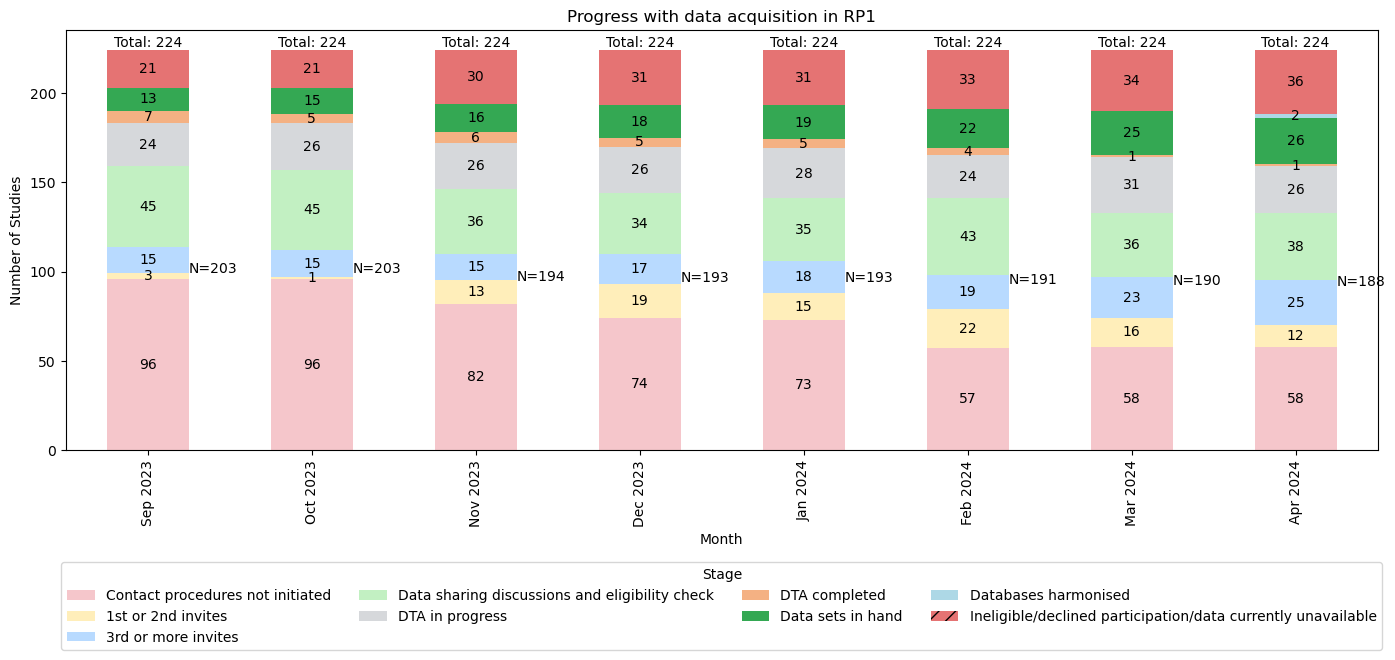

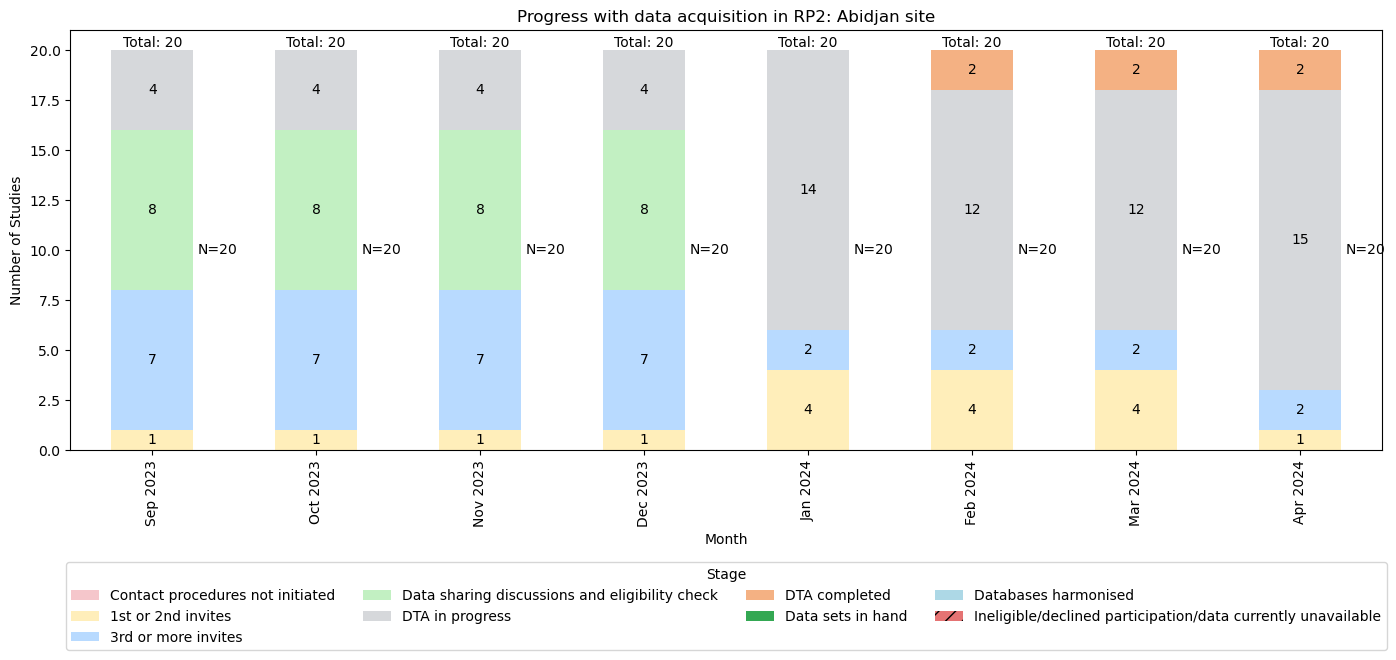

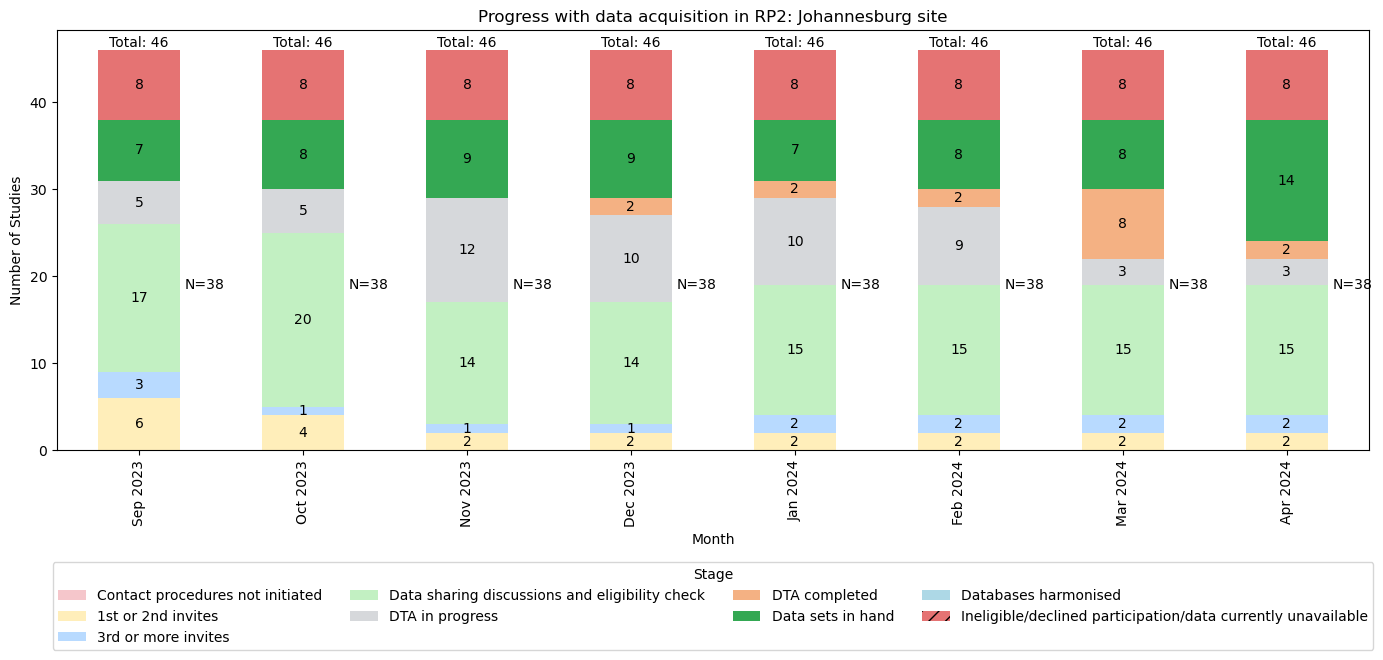

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_stacked_bar_chart(df, title, last_n_months=8, color_map=None, stage_order=None, label_shift=0.0):
    # Drop the rows for totals as they are not stages
    df = df.set_index('Stage').reindex(stage_order).reset_index()
    stages_df = df[~df['Stage'].str.contains("Total")]
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.set_index('Stage').transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 7))
    bars = transposed_df.plot(kind='bar', stacked=True, ax=ax, color=[color_map.get(x, '#333333') for x in stage_order])

    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for bar_patches in ax.containers:
        for bar in bar_patches:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f'{int(height)}', ha='center', va='center')

    # Calculate and place the 'n=' labels for the total height of eligible stacks (excluding the last stage if necessary)
    for i, (index, row) in enumerate(transposed_df.iterrows()):
        cumulative_height = row[stage_order[:-1]].sum()  # Excluding 'Ineligible/declined participation/data currently unavailable'
        if not pd.isna(cumulative_height):
            ax.text(i + label_shift, cumulative_height / 2, f"N={int(cumulative_height)}", ha='center', va='center')

    # Add labels on top of each column for the total number of studies
    for i, (index, row) in enumerate(transposed_df.iterrows()):
        total_height = row.sum()
        if not pd.isna(total_height):
            ax.text(i, total_height, f'Total: {int(total_height)}', ha='center', va='bottom')

    # Add custom legend with hatching
    legend_patches = [Patch(facecolor=color_map.get(stage, '#333333'), 
                            hatch='//' if stage == 'Ineligible/declined participation/data currently unavailable' else '') 
                      for stage in stage_order]
    ax.legend(legend_patches, stage_order, title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(stage_order)//2)

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([x.strftime('%b %Y') for x in transposed_df.index])

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()
    plt.show()

# Define your color map here, with distinctly different colors
color_map = {
    'Contact procedures not initiated': '#f5c6cb',  # Soft Pink
    '1st or 2nd invites': '#ffeeba',  # Light Yellow
    '3rd or more invites': '#b8daff',  # Light Blue
    'Data sharing discussions and eligibility check': '#c2f0c2',  # Light Green, adjusted to be different from other greens
    'DTA in progress': '#d6d8db',  # Light Grey
    'DTA completed': '#f4b183',  # Soft Orange, changed from green for better distinction
    'Data sets in hand': '#34a853',  # Google Green, a brighter and more saturated green
    'Databases harmonised': '#add8e6',  # Light Blue, lighter than the previous one for better distinction
    'Ineligible/declined participation/data currently unavailable': '#e57373'  # Soft Red
}


# Example usage with label_shift affecting 'n=' labels:
plot_stacked_bar_chart(df_rp1, 'Progress with data acquisition in RP1', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)
plot_stacked_bar_chart(df_abj, 'Progress with data acquisition in RP2: Abidjan site', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)
plot_stacked_bar_chart(df_jhb, 'Progress with data acquisition in RP2: Johannesburg site', last_n_months=8, color_map=color_map, stage_order=stage_order, label_shift=0.4)


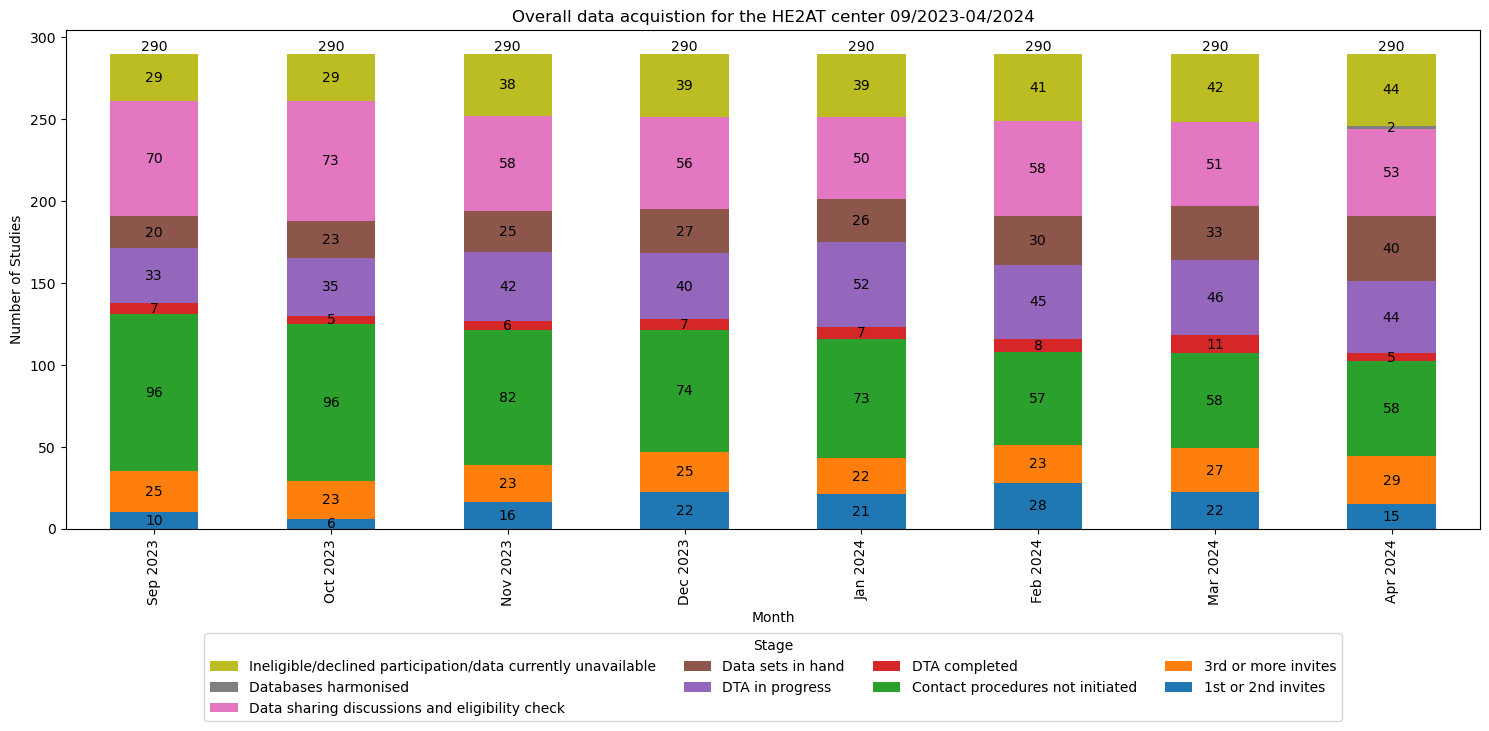

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def combine_and_plot_stacked_bars(dfs, title, last_n_months=8):
    # Combine dataframes for the same stages and months
    combined_df = pd.DataFrame()
    for df in dfs:
        # Fill NaN values with zero to prevent conversion errors
        df = df.fillna(0)
        # Drop the rows for totals as they are not stages
        df_stages = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
        
        # Sum up the numbers for each stage
        if combined_df.empty:
            combined_df = df_stages
        else:
            combined_df = combined_df.add(df_stages, fill_value=0)
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_combined_df = combined_df.transpose()

    # Select the last_n_months
    transposed_combined_df = transposed_combined_df.iloc[-last_n_months:]

    

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 10))  # Increased figure size for better layout
    transposed_combined_df.plot(kind='bar', stacked=True, ax=ax)
    
    # Annotate the total number of studies for each month
    totals = transposed_combined_df.sum(axis=1)
    for i, total in enumerate(totals):
        if not pd.isna(total) and total != 0:
            ax.text(i, total, str(int(total)), ha='center', va='bottom')

    # Annotate the number of studies within each stack stage
    for i in range(len(transposed_combined_df)):
        cum_sum = 0  # Reset cumulative sum for each new stack (month)
        for n, value in enumerate(transposed_combined_df.iloc[i]):
            stage = transposed_combined_df.columns[n]
            # Only label if the value is not 0 and not NaN
            if not pd.isna(value) and value != 0:
                # Calculate the middle point for the current stack section
                mid_point = cum_sum + value/2
                # Annotate with the integer representation of value
                ax.text(i, mid_point, str(int(value)), ha='center', va='center')
            cum_sum += value  # Update the cumulative sum with the current value

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([x.strftime('%b %Y') for x in transposed_combined_df.index])

    # Set legend below the chart
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Stage', loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)

    # Add titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Studies')

    # Adjust layout to fit everything
    fig.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust the rectangle in which the plot fits

    # Display the plot
    plt.show()

# Assuming df_rp1, df_abj, df_jhb are the dataframes you want to combine
combine_and_plot_stacked_bars([df_rp1, df_abj, df_jhb], 'Overall data acquistion for the HE2AT center 09/2023-04/2024', last_n_months=8)











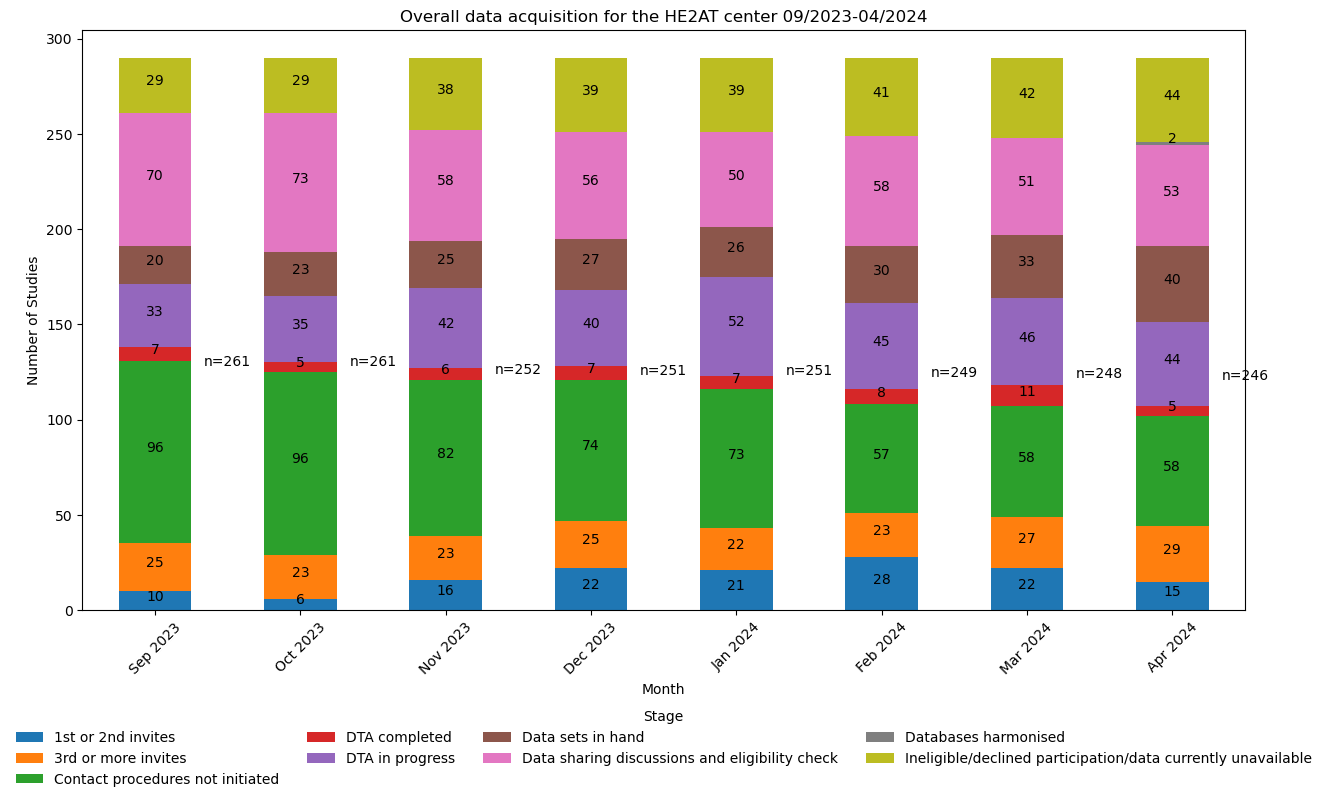

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def combine_and_plot_stacked_bars(dfs, title, start_month=9, start_year=2023, stage_order=None):
    # Combine dataframes for the same stages and months
    combined_df = pd.DataFrame()
    for df in dfs:
        df = df.fillna(0)
        df = df.set_index('Stage')
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.add(df, fill_value=0)

    # Transpose the dataframe to have stages as columns and months as rows
    transposed_combined_df = combined_df.transpose()

    # Ensure index is datetime for comparison
    transposed_combined_df.index = pd.to_datetime(transposed_combined_df.index)
    
    # Filter the DataFrame to include data from September of start_year onwards
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    filtered_df = transposed_combined_df[transposed_combined_df.index >= start_date]

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 10))
    bars = filtered_df.plot(kind='bar', stacked=True, ax=ax)

    # Annotate the number of studies within each stack, excluding zeros
    for bar in bars.containers:
        labels = [f'{v.get_height():.0f}' if v.get_height() != 0 else '' for v in bar]
        ax.bar_label(bar, labels=labels, label_type='center', padding=3)

    # Calculate the sum for each column excluding the ineligible/declined column if it exists
    ineligible_column = 'Ineligible/declined participation/data currently unavailable'
    if ineligible_column in filtered_df.columns:
        sum_excluding_column = filtered_df.sum(axis=1) - filtered_df[ineligible_column]
    else:
        sum_excluding_column = filtered_df.sum(axis=1)

    # Annotate the sum for each column to the right of the bar and total label at the top
    for i, (index, total) in enumerate(sum_excluding_column.items()):
        half_height = total / 2
        bar_width = bars.patches[i].get_width()
        offset = bar_width * 1  # Offset to the right of the bar
        ax.text(i + offset, half_height, f"n={int(total)}", ha='center', va='center')

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([index.strftime('%b %Y') for index in filtered_df.index], rotation=45)

    # Set legend below the chart
    ax.legend(title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(stage_order)//2, frameon=False)

    # Adjust layout to fit everything
    plt.subplots_adjust(bottom=0.3)

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Studies')

    # Show the plot
    plt.show()

# Example call to the function, replace the placeholders with actual dataframes
# Define stage_order based on your data categories
stage_order = [
    'Contact procedures not initiated',
    '1st or 2nd invites',
    '3rd or more invites',
    'Data sharing discussions and eligibility check',
    'DTA in progress',
    'DTA completed',
    'Data sets in hand',
    'Databases harmonised',
    'Ineligible/declined participation/data currently unavailable'
]

combine_and_plot_stacked_bars(
    [df_rp1, df_abj, df_jhb],  # Replace with your actual DataFrames
    'Overall data acquisition for the HE2AT center 09/2023-04/2024',
    start_month=9,
    start_year=2023,
    stage_order=stage_order
)


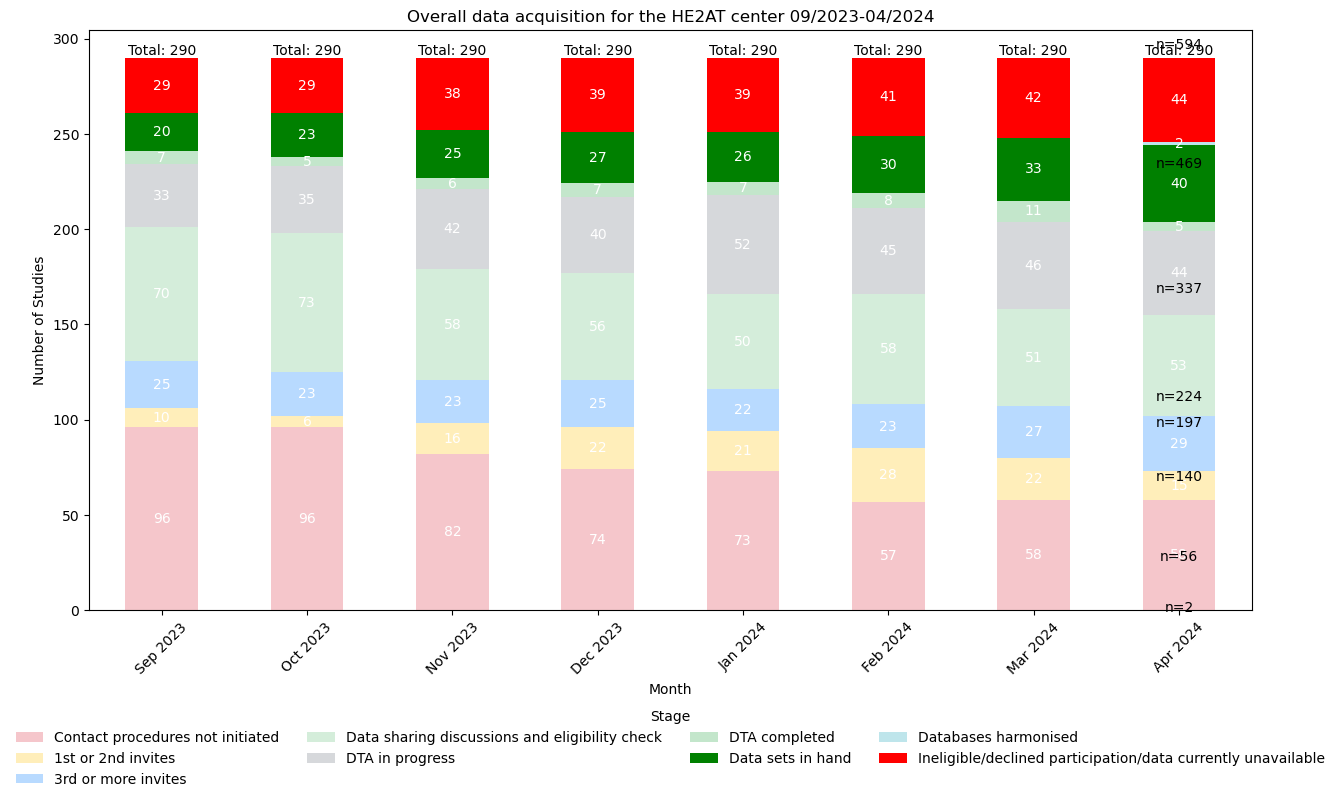

In [14]:


import pandas as pd
import matplotlib.pyplot as plt

def combine_and_plot_stacked_bars(dfs, title, start_month=9, start_year=2023, stage_order=None, color_map=None):
    # Combine dataframes for the same stages and months
    combined_df = pd.DataFrame()
    for df in dfs:
        df = df.fillna(0)
        df = df.set_index('Stage').reindex(stage_order).fillna(0)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.add(df, fill_value=0)

    # Transpose the dataframe to have stages as columns and months as rows
    transposed_combined_df = combined_df.transpose()

    # Ensure index is datetime for comparison
    transposed_combined_df.index = pd.to_datetime(transposed_combined_df.index)
    
    # Filter the DataFrame to include data from September of start_year onwards
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    filtered_df = transposed_combined_df[transposed_combined_df.index >= start_date]

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 10))
    bars = filtered_df.plot(kind='bar', stacked=True, ax=ax, color=[color_map.get(stage) for stage in stage_order])

    # Annotate the number of studies within each stack, excluding zeros and ineligible/declined category
    for bar in bars.containers:
        # Calculate the midpoint of the bar for the 'n=' label
        running_height = 0
        for patch in bar:
            base = patch.get_y()
            height = patch.get_height()
            if height != 0:
                label = f'{int(height)}'
                ax.text(patch.get_x() + patch.get_width() / 2, base + height / 2, label, ha='center', va='center', color='white')
            running_height += height
        # The 'n=' label
        if bar.get_label() != 'Ineligible/declined participation/data currently unavailable':
            ax.text(patch.get_x() + patch.get_width() / 2, running_height / 2, f"n={int(running_height)}", ha='center', va='center')

    # Annotate the total number of studies at the top of each column
    for i, total in enumerate(filtered_df.sum(axis=1)):
        ax.text(i, total, f'Total: {int(total)}', ha='center', va='bottom')

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([index.strftime('%b %Y') for index in filtered_df.index], rotation=45)

    # Set legend below the chart
    ax.legend(title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(stage_order)//2, frameon=False)

    # Adjust layout to fit everything
    plt.subplots_adjust(bottom=0.3)


    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Studies')

    # Show the plot
    plt.show()

stage_order = [
    'Contact procedures not initiated',
    '1st or 2nd invites',
    '3rd or more invites',
    'Data sharing discussions and eligibility check',
    'DTA in progress',
    'DTA completed',
    'Data sets in hand',
    'Databases harmonised',
    'Ineligible/declined participation/data currently unavailable'
]


# Define your color map here
color_map = {
    'Contact procedures not initiated': '#f5c6cb',
    '1st or 2nd invites': '#ffeeba',
    '3rd or more invites': '#b8daff',
    'Data sharing discussions and eligibility check': '#d4edda',
    'DTA in progress': '#d6d8db',
    'DTA completed': '#c3e6cb',
    'Data sets in hand': 'green',  # Green color for "Data sets in hand"
    'Databases harmonised': '#bee5eb',
    'Ineligible/declined participation/data currently unavailable': 'red'  # Red color for "Ineligible/declined participation/data currently unavailable"
}
# Example call to the function, replace the placeholders with actual dataframes
combine_and_plot_stacked_bars(
    [df_rp1, df_abj, df_jhb],  # Replace with your actual DataFrames
    'Overall data acquisition for the HE2AT center 09/2023-04/2024',
    start_month=9,
    start_year=2023,
    stage_order=stage_order,
    color_map=color_map
)


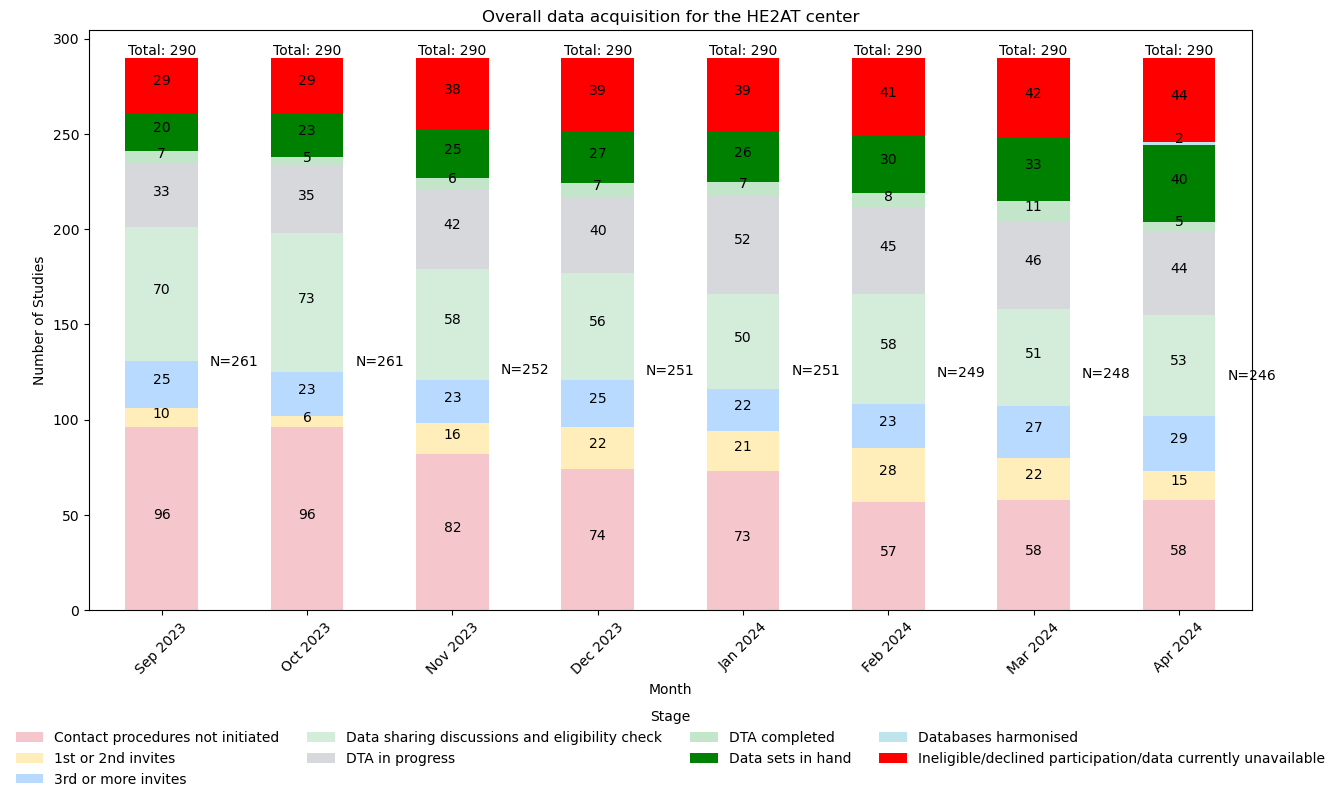

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def combine_and_plot_stacked_bars(dfs, title, start_month=9, start_year=2023, stage_order=None, color_map=None):
    # Combine dataframes for the same stages and months
    combined_df = pd.DataFrame()
    for df in dfs:
        df = df.fillna(0)
        df = df.set_index('Stage').reindex(stage_order).fillna(0)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.add(df, fill_value=0)

    # Transpose the dataframe to have stages as columns and months as rows
    transposed_combined_df = combined_df.transpose()

    # Ensure index is datetime for comparison
    transposed_combined_df.index = pd.to_datetime(transposed_combined_df.index)
    
    # Filter the DataFrame to include data from September of start_year onwards
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    filtered_df = transposed_combined_df[transposed_combined_df.index >= start_date]

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 10))
    bars = filtered_df.plot(kind='bar', stacked=True, ax=ax, color=[color_map.get(stage) for stage in stage_order])

    # Annotate the number of studies within each stack, excluding zeros
    for bar in bars.containers:
        labels = [f'{v.get_height():.0f}' if v.get_height() != 0 else '' for v in bar]
        ax.bar_label(bar, labels=labels, label_type='center', padding=3)

    # Annotate the n= label for the sum excluding ineligible category and total label at the top
    for i, month in enumerate(filtered_df.index):
        month_data = filtered_df.loc[month]
        cumulative_height = month_data.drop('Ineligible/declined participation/data currently unavailable', errors='ignore').sum()
        total_height = month_data.sum()
        
        # Calculate the x position for the n= label, slightly to the right of the center of the bar
        x_position = i + 0.5  # Adjust this value as needed to move the label to the right
        
        ax.text(x_position, cumulative_height / 2, f'N={int(cumulative_height)}', ha='center', va='center')
        ax.text(i, total_height, f'Total: {int(total_height)}', ha='center', va='bottom')


    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([index.strftime('%b %Y') for index in filtered_df.index], rotation=45)

    # Set legend below the chart
    ax.legend(title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(stage_order)//2, frameon=False)

    # Adjust layout to fit everything
    plt.subplots_adjust(bottom=0.3)

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Studies')

    # Show the plot
    plt.show()

# Define the stage_order and color_map as provided
stage_order = [
    'Contact procedures not initiated',
    '1st or 2nd invites',
    '3rd or more invites',
    'Data sharing discussions and eligibility check',
    'DTA in progress',
    'DTA completed',
    'Data sets in hand',
    'Databases harmonised',
    'Ineligible/declined participation/data currently unavailable'
]

color_map = {
    'Contact procedures not initiated': '#f5c6cb',
    '1st or 2nd invites': '#ffeeba',
    '3rd or more invites': '#b8daff',
    'Data sharing discussions and eligibility check': '#d4edda',
    'DTA in progress': '#d6d8db',
    'DTA completed': '#c3e6cb',
    'Data sets in hand': 'green',
    'Databases harmonised': '#bee5eb',
    'Ineligible/declined participation/data currently unavailable': 'red'
}

# Example call to the function, replace the placeholders with actual dataframes
combine_and_plot_stacked_bars(
    [df_rp1, df_abj, df_jhb],  # Replace with your actual DataFrames
    'Overall data acquisition for the HE2AT center',
    start_month=9,
    start_year=2023,
    stage_order=stage_order,
    color_map=color_map
)


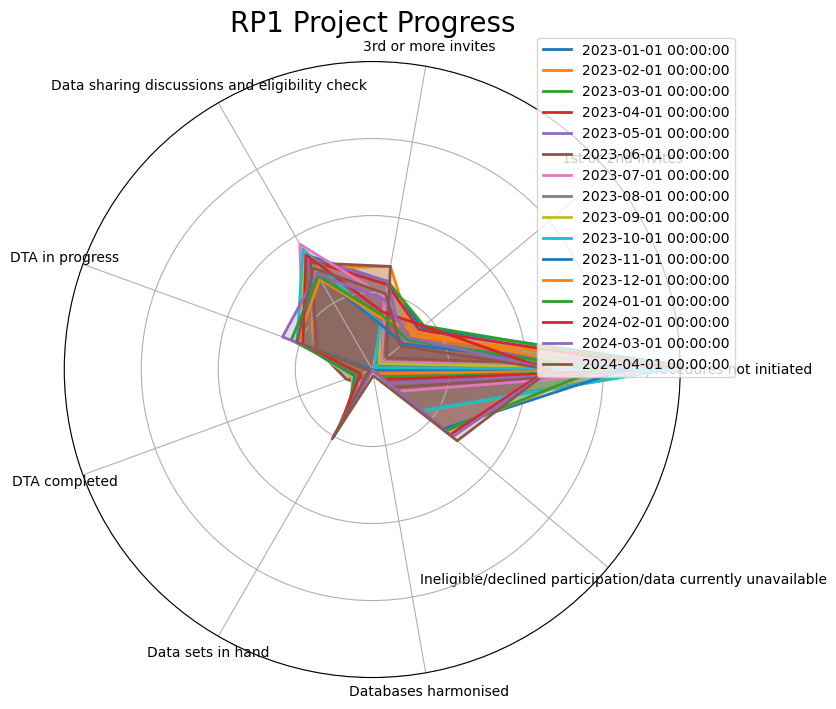

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_radial_stacked_bar(df, title):
    # Extract 'Stage' column for labels
    categories = df['Stage'].tolist()
    
    # Create a new DataFrame to plot, dropping the 'Stage' column
    df_plot = df.drop('Stage', axis=1)
    
    # Number of stages
    num_stages = len(categories)
    
    # Compute angle each category/stage should be located at
    angles = np.linspace(0, 2 * np.pi, num_stages, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop to close the polygon

    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Draw one axe per stage and add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75, 100], ["25", "50", "75", "100"], color="grey", size=7)
    plt.ylim(0, 100)
    
    # Plot data and fill with color for each stage/variable
    for col in df_plot.columns:
        values = df_plot[col].tolist()
        values += values[:1]  # Ensure that the first and last value are the same to close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=col)
        ax.fill(angles, values, alpha=0.25)
    
    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    plt.title(title, size=20)

    # Show the plot
    plt.show()

# Assuming df_rp1 has a 'Stage' column, followed by month columns with data for plotting
plot_radial_stacked_bar(df_rp1, 'RP1 Project Progress')


AttributeError: 'NoneType' object has no attribute 'get'

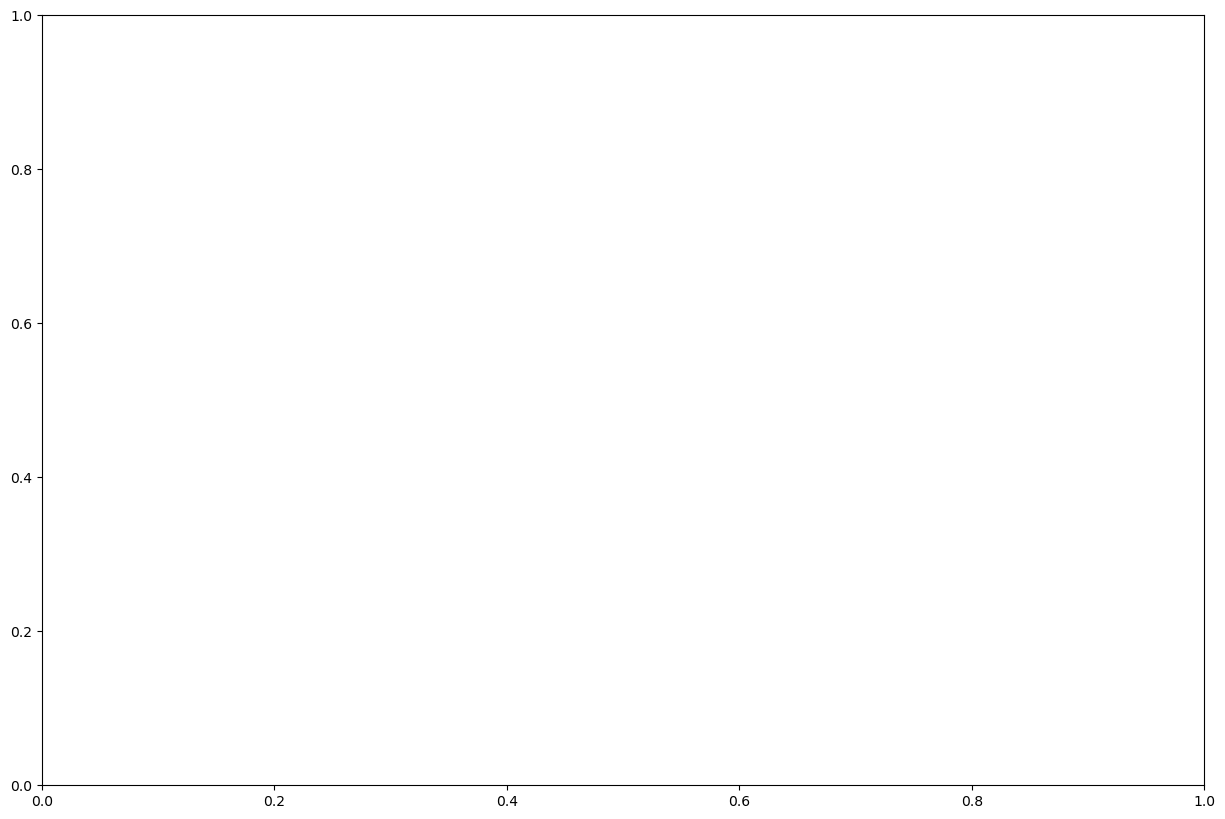

In [17]:
def combine_and_plot_stacked_bars(dfs, title, start_month=9, start_year=2023, color_map=None):
    # Combine dataframes for the same stages and months
    combined_df = pd.DataFrame()
    for df in dfs:
        df = df.fillna(0)
        df = df.set_index('Stage').reindex(stage_order)  # Reindex according to the stage_order
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.add(df, fill_value=0)

    # Transpose the dataframe to have stages as columns and months as rows
    transposed_combined_df = combined_df.transpose()

    # Filter the DataFrame to include data from September of start_year onwards
    filtered_df = transposed_combined_df[transposed_combined_df.index >= pd.Timestamp(year=start_year, month=start_month, day=1)]

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(15, 10))
    # Use color_map for the colors of the stages
    bars = filtered_df.plot(kind='bar', stacked=True, ax=ax, color=[color_map.get(stage) for stage in stage_order])

       # Annotate the number of studies within each stack, excluding zeros
    for bar in bars.containers:
        labels = [f'{v.get_height():.0f}' if v.get_height() != 0 else '' for v in bar]
        ax.bar_label(bar, labels=labels, label_type='center', padding=3)

    # Calculate the sum for each column excluding the ineligible/declined column
    sum_excluding_column = filtered_df.sum(axis=1) - filtered_df['Ineligible/declined participation/data currently unavailable']

    # Annotate the sum for each column to the right of the bar and total label at the top
    for i, (index, total) in enumerate(sum_excluding_column.iteritems()):
        # Position the n= label halfway down the stack and slightly to the right
        half_height = filtered_df.loc[index].sum() / 2
        bar_width = bars.patches[i * len(stage_order)].get_width()
        offset = bar_width / .7  # adjust this value to move the label more to the right
        ax.text(bars.patches[i * len(stage_order)].get_x() + offset, half_height, f"n={int(total)}", ha='center', va='center')

        # Total sum including all studies, placed at the top of each column
        ax.text(i, filtered_df.loc[index].sum(), f"{int(filtered_df.loc[index].sum())}", ha='center', va='bottom')

    # Format the x-axis labels to show Month-Year only
    ax.set_xticklabels([pd.to_datetime(str(x)).strftime('%b %Y') for x in filtered_df.index])

    # Set legend below the chart
    ax.legend(title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(stage_order)//2, frameon=False)

    # Adjust layout to fit everything
    plt.subplots_adjust(bottom=0.3)

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Studies')

    # Show the plot
    plt.show()

# Call the function to combine and plot
combine_and_plot_stacked_bars(
    [df_rp1, df_abj, df_jhb],  # Replace with your actual DataFrames
    'Overall data acquisition for the HE2AT center 09/2023-04/2024',
    start_month=9,
    start_year=2023
)



In [ ]:
import pandas as pd



# Create a DataFrame from the data
df_rp1_countries = pd.read_excel('data/HEAT_Tables_0422_am_2.xlsx', sheet_name='RP1_Countries')

# Calculate the total number of studies for each country
df_rp1_countries['Total Studies'] = df_rp1_countries.drop('Study site', axis=1).sum(axis=1)

# Create a formatted output for each country
df_rp1_countries['Formatted'] = df_rp1_countries['Study site'] + " (n=" + df_rp1_countries['Total Studies'].astype(str) + ")"
formatted_output = df_rp1_countries[['Study site', 'Formatted']].set_index('Study site')

# Print the formatted summary
print(formatted_output)


                            Formatted
Study site                           
Benin                   Benin (n=3.0)
Burkina Faso     Burkina Faso (n=4.0)
Cameroon             Cameroon (n=2.0)
Côte d'Ivoire   Côte d'Ivoire (n=1.0)
Ethiopia            Ethiopia (n=18.0)
Gambia                 Gambia (n=1.0)
Ghana                  Ghana (n=10.0)
Kenya                  Kenya (n=17.0)
Malawi                Malawi (n=19.0)
Nigeria               Nigeria (n=0.0)
Senegal               Senegal (n=1.0)
South Africa    South Africa (n=32.0)
Tanzania            Tanzania (n=23.0)
Multi-country  Multi-country (n=25.0)


In [ ]:
# Save the formatted series to an Excel file
formatted_output.to_excel('Study_Sites_Total_Studies.xlsx', index=False)